<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_six/Lorentz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

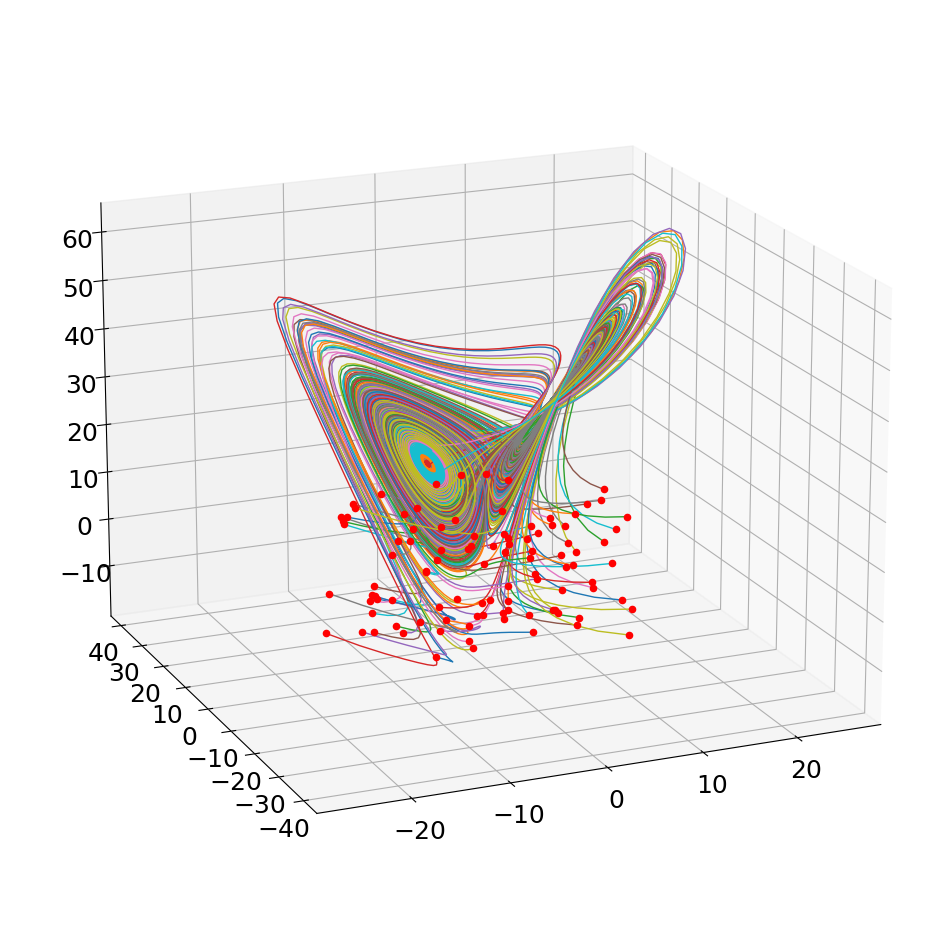

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
#from keras.utils.generic_utils import get_custom_objects
from keras import backend as K


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Parameters
dt = 0.01
T = 8
beta = 8/3
sigma = 10
rho = 28
num_samples = 100

# Time array
t = np.arange(0, T + dt, dt)

# Neural Network input and output initialization
nn_input = np.zeros((num_samples * (len(t) - 1), 3))
nn_output = np.zeros_like(nn_input)

# Lorenz System Derivative Function
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Initial conditions
np.random.seed(123)
initial_conditions = -15 + 30 * np.random.random((num_samples, 3))

# Solving the Lorenz System
x_t = np.asarray([integrate.odeint(lorenz_deriv, initial_condition, t)
                  for initial_condition in initial_conditions])

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})

# Populating Neural Network input and output
for j in range(num_samples):
    slice_start = j * (len(t) - 1)
    slice_end = (j + 1) * (len(t) - 1)
    nn_input[slice_start:slice_end, :] = x_t[j, :-1, :]
    nn_output[slice_start:slice_end, :] = x_t[j, 1:, :]

    # Plotting
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(initial_conditions[j, 0], initial_conditions[j, 1], initial_conditions[j, 2], color='r')

# # Plot settings
ax.view_init(18, -113)
plt.show()


In [8]:
import keras
from keras import layers

model = Sequential()

model.add(layers.Dense(10, input_dim=3, activation="sigmoid"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(3, activation='linear'))


model.compile(optimizer="adam", loss="mse")
history = model.fit(nn_input, nn_output, epochs=1000)

Epoch 1/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 52.1307
Epoch 2/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 1.9518
Epoch 3/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4169
Epoch 4/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1757
Epoch 5/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1058
Epoch 6/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0691
Epoch 7/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0503
Epoch 8/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0405
Epoch 9/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0345
Epoch 10/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0297
Epoch 11/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0269
Epoch 12/1000
2500/2500 [==============================] - 4s 

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
from google.colab import drive
drive.mount('/content/drive')
model.save('lorentz.hdf5')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


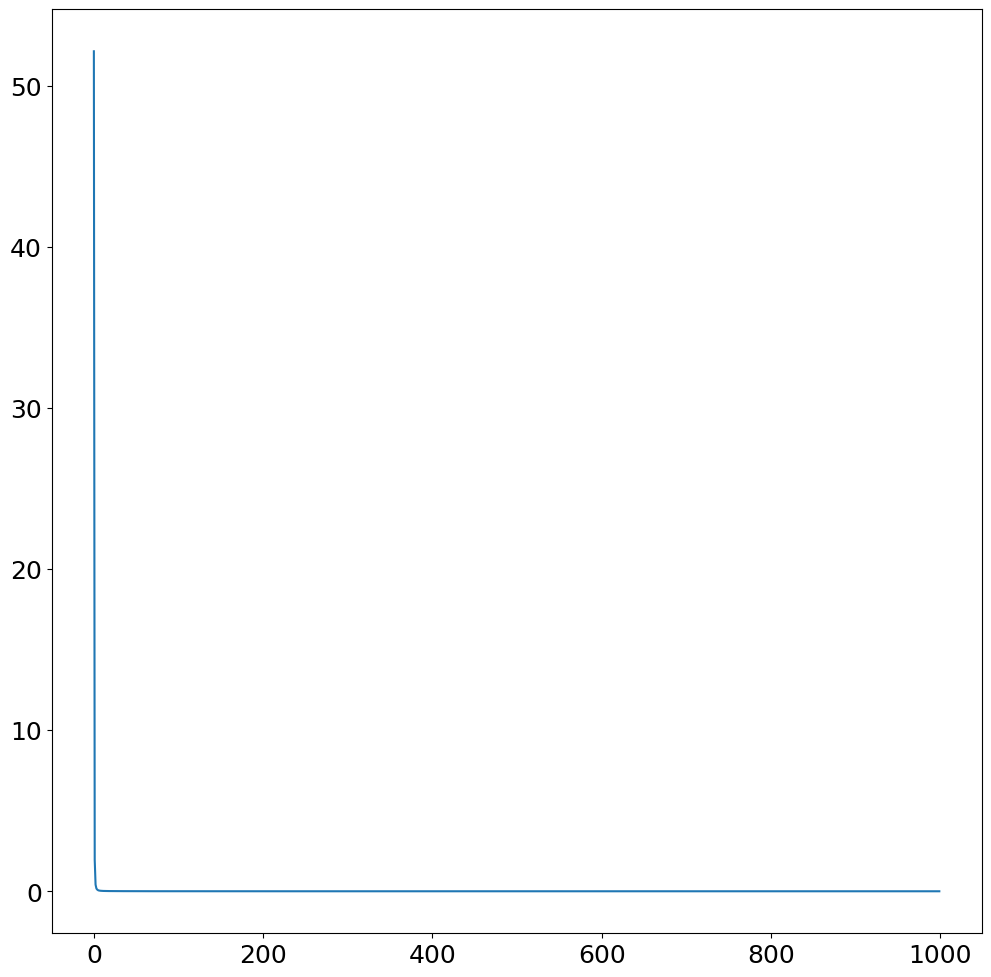

In [12]:
plt.plot(history.history['loss'])
#print(history.history.keys())
#plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
num_traj = 801
ynn = np.zeros((num_traj, len(t), 3))
ynn[: 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
  ynn[:, jj + 1, :] = model.predict(ynn[:, jj, :])

26/26 [==============================] - 0s 2ms/step


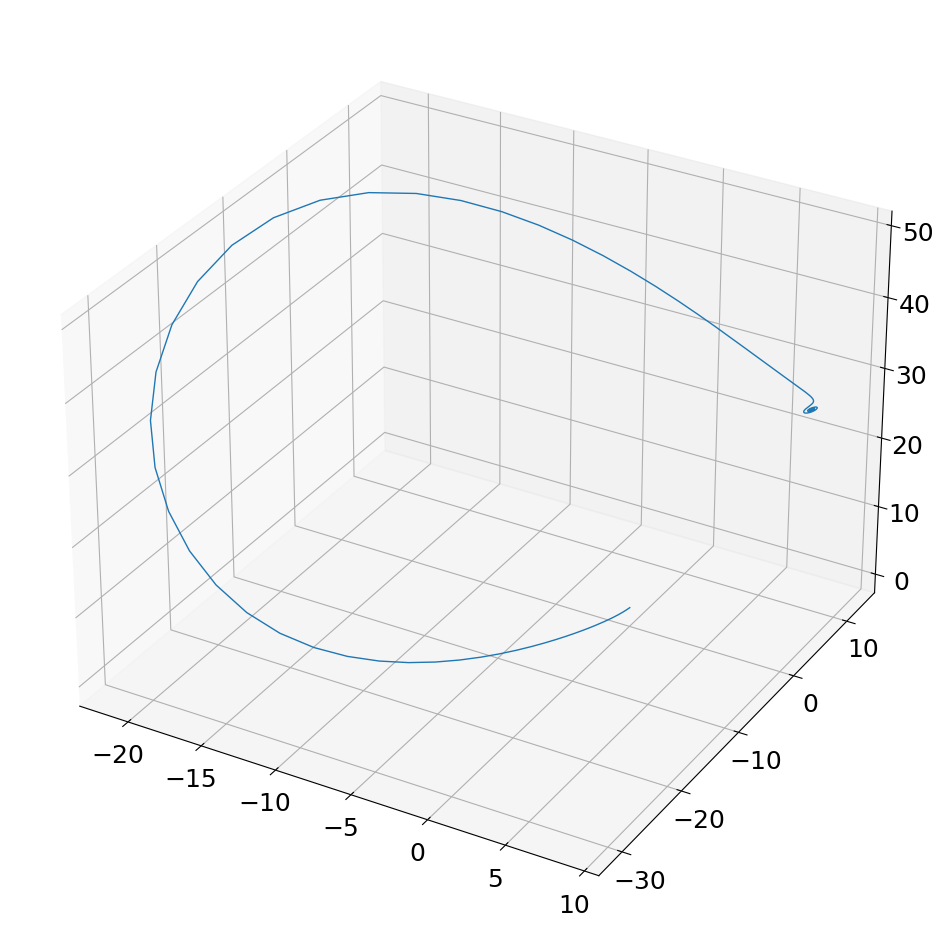

In [26]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
x, y, z = ynn[0,:,:].T
ax.plot(x, y, z,linewidth=1)
plt.show()

In [21]:
ynn[800,:,:].shape

(801, 3)

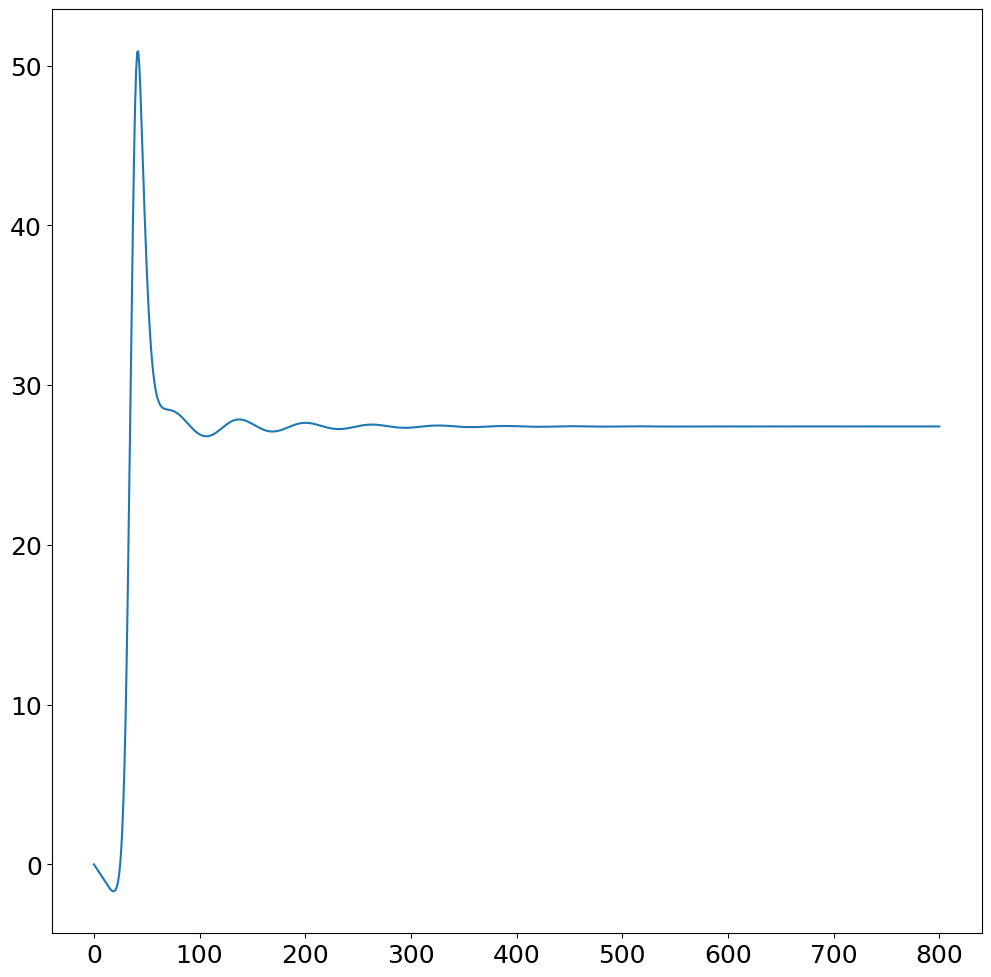

In [27]:
plt.plot(z)